<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine/blob/main/MachineLearning_ADABoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR_features_130.csv")

In [20]:
dataset.head()

,Subject Type,Test Type,Gap duration,n0_gap_peak_ms,p1_gap_peak_ms,n1_gap_peak_ms,p2_gap_peak_ms,n2_gap_peak_ms,p3_gap_peak_ms,n0_nogap_peak_ms,...,fft_nogap_beta_peak_freq,fft_nogap_gamma_peak_amp,fft_nogap_gamma_peak_freq,fft_nogap_alpha_auc,fft_nogap_beta_auc,fft_nogap_gamma_auc,fft_nogap_total_auc,fft_nogap_alpha_peak_auc,fft_nogap_beta_peak_auc,fft_nogap_gamma_peak_auc
0,Healthy,Test,20ms,101,147,214,263,366,442,105,...,20.751953,0.038292,33.935547,15.285080,10.327331,1.672325,86.663602,1.333714,0.940225,0.074033
1,Healthy,Test,20ms,132,155,217,301,383,514,131,...,21.972656,0.118686,35.644531,15.548298,10.137840,3.010325,79.939031,1.775618,0.665121,0.227634
2,Healthy,Test,20ms,107,160,221,305,396,535,128,...,18.310547,0.048787,41.015625,13.078348,8.643543,2.167986,48.851014,1.769573,0.618907,0.093239
3,Healthy,Test,20ms,77,200,233,268,379,570,166,...,16.357422,0.062302,39.306641,7.087050,5.196947,3.325309,47.181061,0.831445,0.453683,0.119996
4,Healthy,Test,20ms,153,128,224,264,337,562,147,...,16.845703,0.100706,32.958984,15.198039,11.166206,2.334388,45.697755,1.665048,0.845292,0.192855


In [21]:
X = dataset.iloc[:, 3:]
y = dataset.iloc[:, 0]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:

from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[19  4]
 [ 8 21]]
              precision    recall  f1-score   support

     Healthy       0.70      0.83      0.76        23
    Tinnitus       0.84      0.72      0.78        29

    accuracy                           0.77        52
   macro avg       0.77      0.78      0.77        52
weighted avg       0.78      0.77      0.77        52

Accurecy:  0.7692307692307693


1/200 round completed......................... Accurecy: 0.6923076923076923
2/200 round completed......................... Accurecy: 0.5961538461538461
3/200 round completed......................... Accurecy: 0.6730769230769231
4/200 round completed......................... Accurecy: 0.5192307692307693
5/200 round completed......................... Accurecy: 0.5384615384615384
6/200 round completed......................... Accurecy: 0.5576923076923077
7/200 round completed......................... Accurecy: 0.6153846153846154
8/200 round completed......................... Accurecy: 0.5769230769230769
9/200 round completed......................... Accurecy: 0.5961538461538461
10/200 round completed......................... Accurecy: 0.5961538461538461
11/200 round completed......................... Accurecy: 0.5961538461538461
12/200 round completed......................... Accurecy: 0.6153846153846154
13/200 round completed......................... Accurecy: 0.6346153846153846
14/200 r

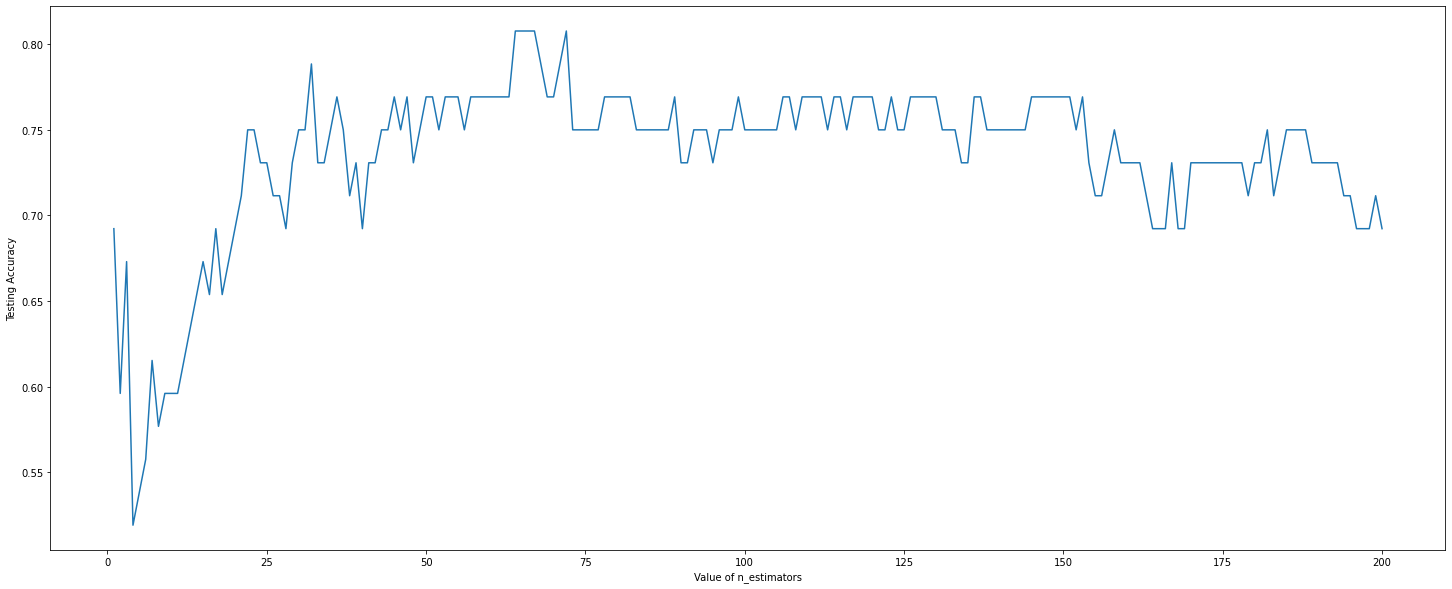

In [25]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [26]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[20  3]
 [ 7 22]]
              precision    recall  f1-score   support

     Healthy       0.74      0.87      0.80        23
    Tinnitus       0.88      0.76      0.81        29

    accuracy                           0.81        52
   macro avg       0.81      0.81      0.81        52
weighted avg       0.82      0.81      0.81        52

Accurecy:  0.8076923076923077
